In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [5]:
# cnn 모델 구축

cnn = Sequential()

cnn.add(Conv2D(input_shape=(28, 28, 1), kernel_size=(3,3), filters = 32, activation = 'relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters = 64, activation = 'relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [6]:
#CNN 모델 컴파일 및 학습
cnn.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

hist = cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 48s 101ms/step - loss: 0.2635 - accuracy: 0.9197 - val_loss: 0.0545 - val_accuracy: 0.9825
Epoch 2/30
469/469 [==============================] - 47s 100ms/step - loss: 0.0913 - accuracy: 0.9724 - val_loss: 0.0398 - val_accuracy: 0.9864
Epoch 3/30
469/469 [==============================] - 53s 112ms/step - loss: 0.0691 - accuracy: 0.9799 - val_loss: 0.0355 - val_accuracy: 0.9882
Epoch 4/30
469/469 [==============================] - 50s 106ms/step - loss: 0.0576 - accuracy: 0.9826 - val_loss: 0.0316 - val_accuracy: 0.9900
Epoch 5/30
469/469 [==============================] - 74s 157ms/step - loss: 0.0474 - accuracy: 0.9851 - val_loss: 0.0324 - val_accuracy: 0.9895
Epoch 6/30
469/469 [==============================] - 88s 187ms/step - loss: 0.0422 - accuracy: 0.9865 - val_loss: 0.0276 - val_accuracy: 0.9913
Epoch 7/30
469/469 [==============================] - 89s 189ms/step - loss: 0.0350 - accuracy: 0.9894 - val_loss: 0.0305 - val_ac

In [6]:
#모델 정확도 평가
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.0535 - accuracy: 0.9916


[0.053473059087991714, 0.991599977016449]

In [7]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')

plt.grid()
plt.show()

<Figure size 640x480 with 1 Axes>

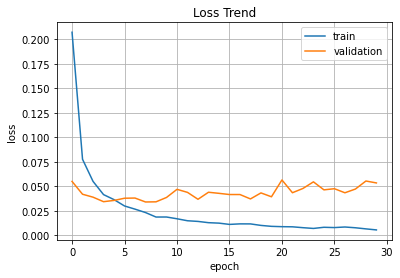

In [8]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')

plt.grid()
plt.show()